# HW3

In [143]:
!gdown 1rovazK48q7pHcEM271aX70Dr594NYQ77
!gdown 1ZCHuj6JtyOkb5ismn3qF3Rp2DRGJ1tRk

Downloading...
From: https://drive.google.com/uc?id=1rovazK48q7pHcEM271aX70Dr594NYQ77
To: /content/train.csv
100% 20.1M/20.1M [00:00<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZCHuj6JtyOkb5ismn3qF3Rp2DRGJ1tRk
To: /content/test.csv
100% 2.03M/2.03M [00:00<00:00, 207MB/s]


In [144]:
!pip install --upgrade gensim
!pip install arabic_reshaper
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
import pandas
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

In [146]:
pandas.set_option('display.max_colwidth', None)

## Question 1

In [147]:
train_input = pandas.read_csv('train.csv')
test_input = pandas.read_csv('test.csv')

In [148]:
def clean_text(document):
  words = document.split(' ')
  words = [w.replace('\u200c','') for w in words]
  # third parameter says remove these character
  # first parameter says to replace that argument with the argument in second parameter
  translation_table = str.maketrans('', '', "><.،؟؛:{}\|+ـ()*&^٪$#❊!/[]=-")
  words = [w.translate(translation_table) for w in words]
  words = [w for w in words if w.isalpha()]
  return words

### Word2Vec

[first_link](https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92)

[second link](https://towardsdatascience.com/word2vec-skip-gram-model-part-1-intuition-78614e4d6e0b)

In [149]:
# Genism word2vec requires that a format of ‘list of lists’ for training where every document is contained in a list and every list contains lists of tokens of that document.
train_docs = []
train_id = []
for index,row in train_input.iterrows():
  train_docs.append(clean_text(row.article))
  train_id.append(row.id)


In [150]:
print(len(train_docs))
print(len(train_id))

732
732


In [151]:
train_list = list(zip(train_id,train_docs))

In [152]:
model_w2v = Word2Vec(train_docs, vector_size=300, window=10, min_count=5,sg=1,workers=4)

### Doc2Vec

[fist_link](https://radimrehurek.com/gensim/models/doc2vec.html)

[second_link](https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5)

In [153]:
documents = [TaggedDocument(doc,[i]) for i, doc in train_list]
model_d2v = Doc2Vec(documents, vector_size=300, window=10, min_count=5,workers=4)

## Question 2

In [154]:
test_docs = []
test_id = []
for index, row in test_input.iterrows():
  test_docs.append(clean_text(row.article))
  test_id.append(row.id)

In [155]:
print(len(test_docs))
print(len(test_id))

82
82


In [156]:
test_list = list(zip(test_id,test_docs))

In [157]:
def create_tf_idf_dics(docs,dids):
  # term-doc key=term value=dict(doc,number of times a term is in doc)
  term_doc = {}
  # doc-term key=doc value=dict(term,number of times a term is in doc)
  doc_term = {}
  for doc,did in zip(docs,dids):
    doc_term[did] = {}
    for term in doc:
      if term in doc_term[did]:
        doc_term[did][term] += 1
      else:
        doc_term[did][term] = 1

      if term not in term_doc:
        term_doc[term] = {}
      if did in term_doc[term]:
        term_doc[term][did] += 1
      else:
        term_doc[term][did] = 1
        
  return term_doc, doc_term


In [158]:
term_doc_test, doc_term_test = create_tf_idf_dics(test_docs, test_id)
term_doc_train, doc_term_train = create_tf_idf_dics(train_docs,train_id)

In [159]:
list(term_doc_test.items())[0]

('جامعه',
 {'Doc36': 18,
  'Doc635': 13,
  'Doc384': 7,
  'Doc624': 10,
  'Doc25': 2,
  'Doc357': 5,
  'Doc450': 1,
  'Doc173': 5,
  'Doc21': 1,
  'Doc504': 1,
  'Doc296': 11,
  'Doc381': 2,
  'Doc237': 3,
  'Doc687': 6,
  'Doc806': 4,
  'Doc5': 3,
  'Doc11': 1,
  'Doc688': 4,
  'Doc196': 2,
  'Doc89': 3,
  'Doc803': 6,
  'Doc443': 16,
  'Doc160': 1,
  'Doc8': 1,
  'Doc497': 4,
  'Doc206': 5,
  'Doc805': 4,
  'Doc285': 2,
  'Doc246': 4,
  'Doc306': 1,
  'Doc711': 1,
  'Doc152': 2,
  'Doc554': 5,
  'Doc513': 1,
  'Doc247': 1})

In [160]:
list(doc_term_test.items())[0]

('Doc36',
 {'جامعه': 18,
  'ايراني': 10,
  'و': 92,
  'نقاشي': 16,
  'معاصر': 24,
  'تاملي': 1,
  'در': 69,
  'ايران': 7,
  'عبدالمجيد': 1,
  'حسيني': 1,
  'راد': 1,
  'اين': 41,
  'بحث': 3,
  'اگرچه': 2,
  'تاكيد': 1,
  'كلي': 2,
  'بر': 7,
  'هنر': 29,
  'خواهد': 9,
  'بود': 2,
  'سعي': 2,
  'خواهيم': 4,
  'كرد': 7,
  'نگاهي': 2,
  'نيز': 13,
  'به': 62,
  'جهان': 5,
  'بيفكنيم': 1,
  'زيرا': 3,
  'نظر': 9,
  'مي': 48,
  'رسد': 4,
  'بودن': 9,
  'پديده': 1,
  'اي': 12,
  'است': 47,
  'جهاني': 7,
  'نه': 12,
  'ملي': 4,
  'معناي': 6,
  'دوره': 11,
  'كه': 57,
  'ما': 29,
  'آن': 33,
  'نفس': 1,
  'كشيم': 1,
  'كار': 2,
  'كنيم': 10,
  'عصر': 5,
  'ماست': 3,
  'متعلق': 3,
  'هستيم': 2,
  'يا': 12,
  'عبارت': 1,
  'ديگر': 6,
  'هم': 6,
  'از': 43,
  'جهت': 2,
  'پذيرد': 1,
  'هر': 5,
  'اعتبار': 2,
  'نسلي': 2,
  'زيد': 1,
  'بنابراين': 1,
  'هاي': 8,
  'گذشته': 7,
  'آينده': 1,
  'محسوب': 1,
  'شوند': 3,
  'اما': 5,
  'وقتي': 1,
  'گفته': 1,
  'شود': 5,
  'مقصود': 4,
  'فقط': 1,
  'همز

In [161]:
import math
def get_tf_idf(term,doc,term_doc,N):
  idf = 0
  if len(term_doc[term]) > 0: 
    idf = math.log(N / len(term_doc[term]) ,2)

  tf = 0
  if doc in term_doc[term]:
    count = term_doc[term][doc]
    if count > 0:
      tf = 1 + math.log(count,10)
  return tf * idf

### A)

In [162]:
# computing weighted average of w2v vectors for documents of dataset
def get_weighted_w2v_vectors(doc_words, w2v_model, term_doc, doc_num):
  data_w2v_dic = {}

  for doc in doc_words:
    # doc [0] doc id
    # doc [1] document
    tf_idf_sum = 0
    doc_vec_sum = 0

    # tf_idf is weight of each word in a doc
    # tf_idf(word,doc)  * w2v_model[word] / tf_idf

    for word in doc[1]:
      if word in w2v_model.wv.key_to_index:
        doc_vec_sum += get_tf_idf(word, doc[0], term_doc, doc_num) * w2v_model.wv[word]
        tf_idf_sum += get_tf_idf(word, doc[0], term_doc,doc_num)

    data_w2v_dic[doc[0]] = doc_vec_sum / tf_idf_sum 

  return data_w2v_dic

In [163]:
# get train data word2vec vectors (weighted-average with TF-IDF)
train_w2v_dic = get_weighted_w2v_vectors(train_list, model_w2v, term_doc_train, len(train_list))
# get test data word2vec vectors (weighted-average with TF-IDF)
test_w2v_dic = get_weighted_w2v_vectors(test_list, model_w2v, term_doc_test, len(test_list))

### B)

In [164]:
def get_d2v_vectors(doc_words, d2v_model, data_type):
  data_d2v_dic = {}
  for doc in doc_words:
    if data_type == 'train':
      # creates vector for documents of unique tags
      # train d2v vector
      data_d2v_dic[doc[0]] = d2v_model.dv[doc[0]]
    else:
      # result the vector for a given new document
      data_d2v_dic[doc[0]] = d2v_model.infer_vector(doc[1])
  return data_d2v_dic


In [165]:
train_d2v_dic = get_d2v_vectors(train_list,model_d2v,'train')

In [166]:
test_d2v_dic = get_d2v_vectors(test_list,model_d2v,'test')

## Question 3

In [167]:
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
docs = ['Doc443', 'Doc428', 'Doc635']

In [169]:
def similarity(doc_name, train_dic, test_dic):
  similarities = []
  for id,doc in train_list:
    similarities.append((id,cosine_similarity([train_dic[id]],[test_dic[doc_name]])[0][0]))
  return sorted(similarities,key=lambda tup:tup[1],reverse=True)[0]

In [170]:
for doc in docs:
  first_way = similarity(doc,train_w2v_dic,test_w2v_dic)
  second_way = similarity(doc,train_d2v_dic,test_d2v_dic)
  print(doc)
  print(f'A) {first_way}')
  print(f'B) {second_way}')
  print('------')

Doc443
A) ('Doc595', 0.99278635)
B) ('Doc415', 0.7380497)
------
Doc428
A) ('Doc503', 0.9760588)
B) ('Doc458', 0.63485336)
------
Doc635
A) ('Doc194', 0.99241215)
B) ('Doc194', 0.72730917)
------


## Question 4

In [172]:
words = ['بهداشت','استقلال','رودخانه']
for word in words:
  print(word)
  print(model_w2v.wv.most_similar(word)[:3])
  print('------')

بهداشت
[('بهداشتي', 0.6947864890098572), ('پرستاران', 0.6687614321708679), ('باروري', 0.6680892109870911)]
------
استقلال
[('پاس', 0.5536940693855286), ('سپاهان', 0.552954375743866), ('سپاسي', 0.5495162606239319)]
------
رودخانه
[('درياچه', 0.7651989459991455), ('اترك', 0.7560311555862427), ('رودهاي', 0.7501093149185181)]
------


## Question 5

In [179]:
from sklearn.manifold import TSNE

In [203]:
import matplotlib.pyplot as plt

In [200]:
similar_10_vector = []
for word in words:
  print(word)
  similar_10 = model_w2v.wv.most_similar(word)[:10]
  for x in similar_10:
    similar_10_vector.append(model_w2v.wv[x[0]])
  similar_10_vector.append(model_w2v.wv[word])

بهداشت
استقلال
رودخانه


In [201]:
X_embedded = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32).fit_transform(similar_10_vector)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [202]:
len(X_embedded)

33

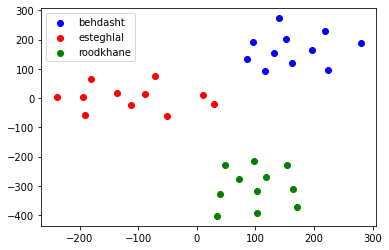

In [204]:
plt.scatter(X_embedded[:11, 0], X_embedded[:11, 1], color='blue', label='behdasht')
plt.scatter(X_embedded[11:22, 0], X_embedded[11:22, 1], color='red', label='esteghlal')
plt.scatter(X_embedded[22:33, 0], X_embedded[22:33, 1], color='green', label='roodkhane')
plt.legend()
plt.show()